In [2]:
# Data manipulation and processing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Display settings
%matplotlib inline


In [8]:
# Load the dataset
df = pd.read_csv('../data/car_data.csv')

# Display the first few rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


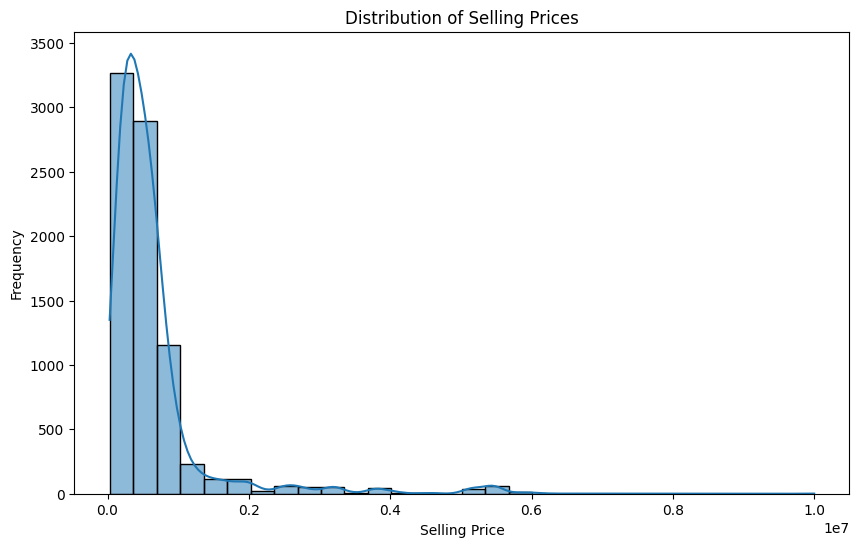

In [9]:
# Check column names and data types
df.info()

# Display summary statistics
df.describe()

# Visualization 1: Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


In [10]:
# Check for missing values
print(df.isnull().sum())

# Convert columns to numeric, forcing errors to NaN
df['mileage(km/ltr/kg)'] = pd.to_numeric(df['mileage(km/ltr/kg)'], errors='coerce')
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['seats'] = pd.to_numeric(df['seats'], errors='coerce')

# Fill missing values for specific columns with their median
df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].median(), inplace=True)
df['engine'].fillna(df['engine'].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

# Check for missing values again after filling
print(df.isnull().sum())


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64


In [11]:
# Calculate the car's age
df['age'] = 2024 - df['year']

# Drop the original 'year' column
df.drop(columns=['year'], inplace=True)


In [12]:
# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Drop the 'name' column as it’s unlikely to be useful
df.drop(columns=['name'], inplace=True)

# Display the first few rows after encoding
df.head()


,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,10,True,False,False,True,False,True,False,False,False,False
1,370000,120000,21.14,1498.0,103.52,5.0,10,True,False,False,True,False,True,False,True,False,False
2,158000,140000,17.70,1497.0,78.00,5.0,18,False,False,True,True,False,True,False,False,False,True
3,225000,127000,23.00,1396.0,90.00,5.0,14,True,False,False,True,False,True,False,False,False,False
4,130000,120000,16.10,1298.0,88.20,5.0,17,False,False,True,True,False,True,False,False,False,False


In [13]:
# Select the features to scale
features_to_scale = ['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'age']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [14]:
# Define features (X) and target (y)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
def error_details():
    # Initialize Linear Regression model
    lin_reg = LinearRegression()

    # Train the model
    lin_reg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = lin_reg.predict(X_test)

    # Evaluate the model
    print('Linear Regression R²:', r2_score(y_test, y_pred))
    print('Linear Regression MSE:', mean_squared_error(y_test, y_pred))

    # Initialize Lasso Regression model with alpha=0.1
    lasso_reg = Lasso(alpha=0.1)

    # Train the model
    lasso_reg.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lasso = lasso_reg.predict(X_test)

    # Evaluate the model
    print('Lasso Regression R²:', r2_score(y_test, y_pred_lasso))
    print('Lasso Regression MSE:', mean_squared_error(y_test, y_pred_lasso))

In [18]:
def plot_details():
    # Visualization 2: Actual vs Predicted Selling Prices
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, label='Linear Regression', alpha=0.7)
    plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit')
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Actual vs Predicted Selling Prices')
    plt.legend()
    plt.show()

In [19]:
def plot_residuals():
    # Calculate residuals
    residuals_linear = y_test - y_pred
    residuals_lasso = y_test - y_pred_lasso

    plt.figure(figsize=(12, 6))

    # Residuals for Linear Regression
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals_linear, alpha=0.7, color='blue')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Linear Regression Residuals')
    plt.xlabel('Predicted Selling Price')
    plt.ylabel('Residuals')
    plt.grid(True)

    # Residuals for Lasso Regression
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.7, color='green')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Lasso Regression Residuals')
    plt.xlabel('Predicted Selling Price')
    plt.ylabel('Residuals')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [20]:
def model_details():
    error_details() # Error metrics
    plot_details() # Plot: Actual vs Predicted Prices
    plot_residuals() # Plot: Residuals

Linear Regression R²: 0.6978741924412628
Linear Regression MSE: 198038765899.44797
Lasso Regression R²: 0.6978735262728541
Lasso Regression MSE: 198039202562.47443


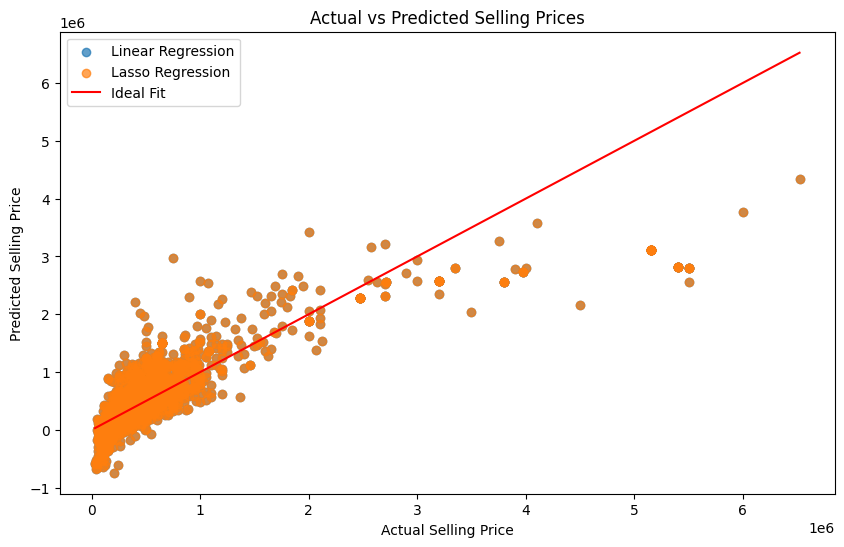

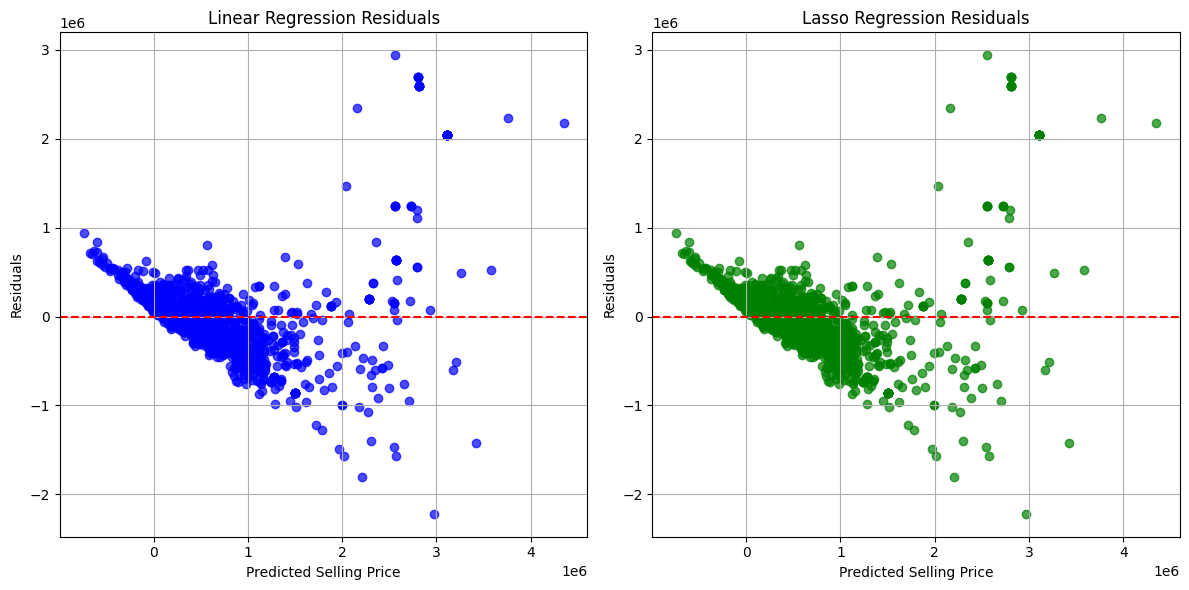

In [21]:
model_details()

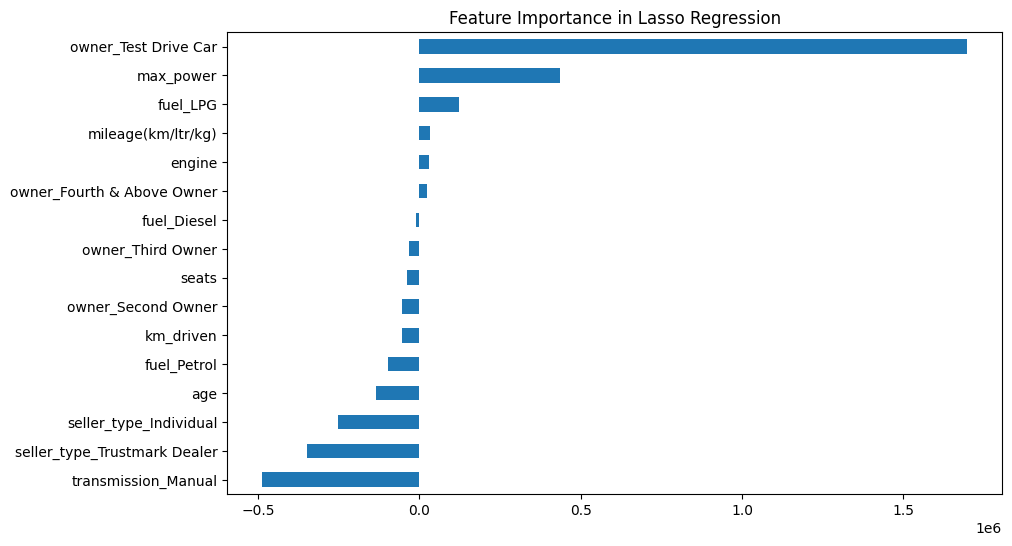

In [20]:
# Get feature importance from Lasso model
lasso_coefficients = pd.Series(lasso_reg.coef_, index=X.columns)

# Visualization 3: Feature Importance in Lasso Regression
plt.figure(figsize=(10,6))
lasso_coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance in Lasso Regression')
plt.show()


In [21]:
# Define a range of alpha values for Lasso regularization
alpha_range = {'alpha': np.logspace(-4, 0, 50)}

# Initialize GridSearchCV for hyperparameter tuning
lasso_cv = GridSearchCV(Lasso(), alpha_range, cv=5)

# Fit the model
lasso_cv.fit(X_train, y_train)

# Best alpha value
print('Best alpha for Lasso:', lasso_cv.best_params_['alpha'])


Best alpha for Lasso: 1.0


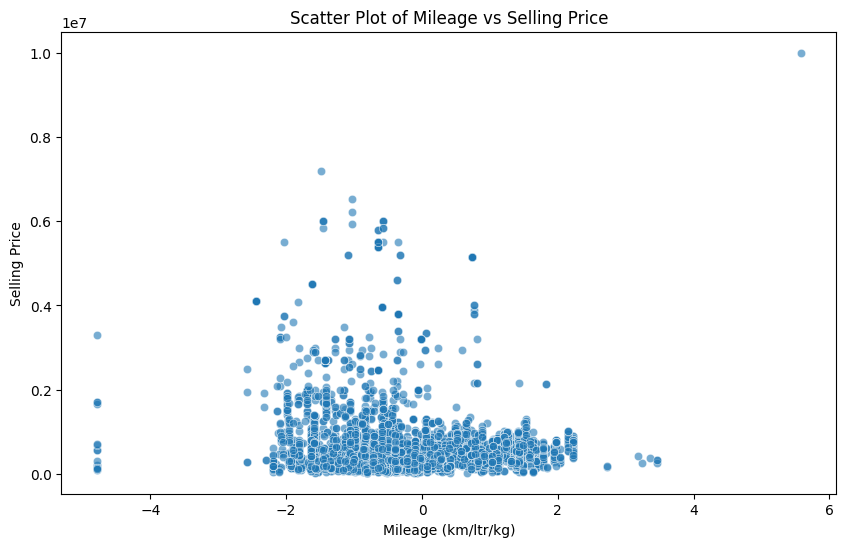

In [23]:
# Visualization 2: Scatter plot of Mileage vs Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage(km/ltr/kg)', y='selling_price', data=df, alpha=0.6)
plt.title('Scatter Plot of Mileage vs Selling Price')
plt.xlabel('Mileage (km/ltr/kg)')
plt.ylabel('Selling Price')
plt.show()


C:\Users\2004s\AppData\Local\Temp\ipykernel_20532\2847986841.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel Type', y='selling_price', data=mean_prices_filtered, palette='viridis')


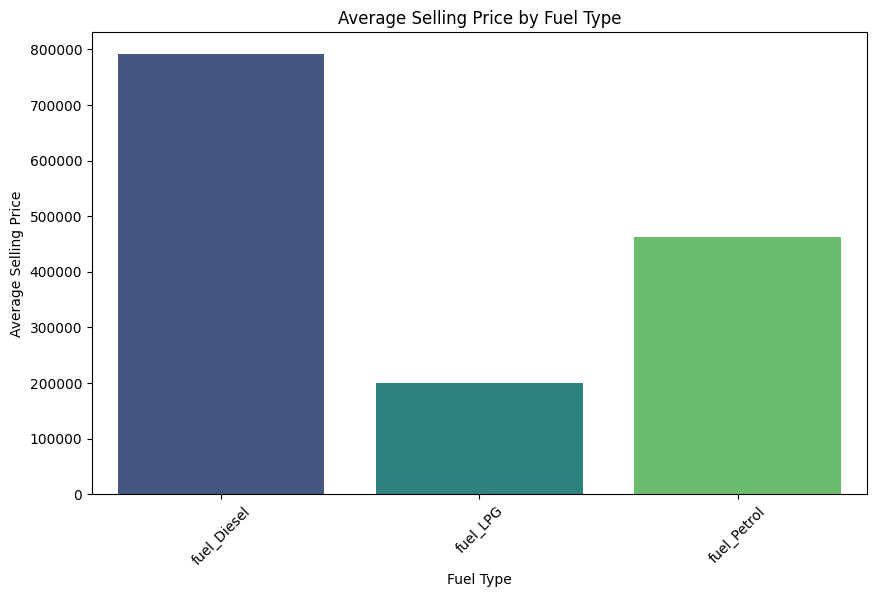

In [28]:
# Visualization 3: Average Selling Price by Fuel Type
plt.figure(figsize=(10, 6))
# Creating a DataFrame to calculate mean selling price for each fuel type
mean_prices = df[['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'selling_price']].groupby(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']).mean().reset_index()
mean_prices_melted = mean_prices.melt(id_vars='selling_price', value_vars=['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol'], 
                                       var_name='Fuel Type', value_name='Fuel Present')
mean_prices_filtered = mean_prices_melted[mean_prices_melted['Fuel Present'] == 1]

sns.barplot(x='Fuel Type', y='selling_price', data=mean_prices_filtered, palette='viridis')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Function to predict the selling price
def predict_price(year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats):
    # Calculate the car's age
    age = 2024 - year

    # Create a DataFrame for input
    input_data = pd.DataFrame({
        'km_driven': [km_driven],
        'mileage(km/ltr/kg)': [mileage],
        'engine': [engine],
        'max_power': [max_power],
        'seats': [seats],
        'age': [age],
        'fuel_Diesel': [1 if fuel == 'Diesel' else 0],
        'fuel_LPG': [1 if fuel == 'LPG' else 0],
        'fuel_Petrol': [1 if fuel == 'Petrol' else 0],
        'seller_type_Individual': [1 if seller_type == 'Individual' else 0],
        'seller_type_Trustmark Dealer': [1 if seller_type == 'Trustmark Dealer' else 0],
        'transmission_Manual': [1 if transmission == 'Manual' else 0],
        'owner_Fourth & Above Owner': [1 if owner == 'Fourth & Above Owner' else 0],
        'owner_Second Owner': [1 if owner == 'Second Owner' else 0],
        'owner_Test Drive Car': [1 if owner == 'Test Drive Car' else 0],
        'owner_Third Owner': [1 if owner == 'Third Owner' else 0]
    })

    # Scale the features using the previously fitted scaler
    input_data[features_to_scale] = scaler.transform(input_data[features_to_scale])

    # Predict using both models
    predicted_price_linear = lin_reg.predict(input_data)[0]
    predicted_price_lasso = lasso_reg.predict(input_data)[0]

    return predicted_price_linear, predicted_price_lasso

# Example inputs for prediction
year = int(input("Enter car year: "))  # Year of the car
km_driven = float(input("Enter kilometers driven: "))  # Distance driven
fuel = input("Enter fuel type (Diesel/LPG/Petrol): ")  # Fuel type
seller_type = input("Enter seller type (Individual/Trustmark Dealer): ")  # Seller type
transmission = input("Enter transmission type (Manual/Automatic): ")  # Transmission type
owner = input("Enter owner type (First/Second/Third/Fourth & Above/Test Drive Car): ")  # Owner type
mileage = float(input("Enter mileage (km/ltr): "))  # Mileage
engine = float(input("Enter engine size (cc): "))  # Engine size
max_power = float(input("Enter max power (bhp): "))  # Max power
seats = int(input("Enter number of seats: "))  # Number of seats

# Get predictions
predicted_price_linear, predicted_price_lasso = predict_price(year, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats)

# Print the predicted prices
print(f"Predicted Selling Price (Linear Regression): {predicted_price_linear:.2f}")
print(f"Predicted Selling Price (Lasso Regression): {predicted_price_lasso:.2f}")


Predicted Selling Price (Linear Regression): 1055948.98
Predicted Selling Price (Lasso Regression): 1055928.63
